# Gykorlat 08
## Lineáris regresszió regularizálása és Bias - Variancia
### Vízfolyás
A feladat első felében implementálásra kerül egy lineáris regresszi, hogy előrejelezhessük a kifolyt víz mennyiségét egy tartályból, annak alapján, hogy abban mennyi víz van. A feladat második felében megfigyeljük a tanulóalgoritmusok debuggolását és a bias v.s. variancia hatását.

### 1: Importálás, adatok betöltése és vizualizálása

Shape of X: (12, 1)
Shape of Y: (12, 1)


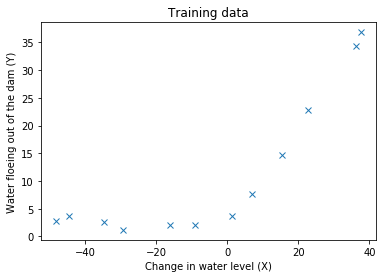

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import fmin_tnc

data = loadmat("Lab8data.mat")                          # adatok betöltése
X = data["X"]                                           # adatok szerkesztése változókba
Y = data["y"]
X_test = data["Xtest"]
Y_test = data["ytest"]
X_val = data["Xval"]
Y_val = data["yval"]

del data
m = X.shape[0]
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)

plt.plot(X,Y,'x')                                       # adatok megjelenítése
plt.title('Training data')
plt.xlabel('Change in water level (X)')
plt.ylabel('Water floeing out of the dam (Y)')
plt.show()


### 2: Regularizált lineáris regresszió

In [45]:
def linearRegCostFunction(w,*args):
    X,y,Lambda = args
    m = y.shape[0]
    y=y.reshape(m,1)

    w_0 = w.copy()
    w_0[0] = 0
    penalty = (Lambda/(2*m))*np.sum(w_0**2)
    C = (1/(2*m)) * (np.sum(((X @ w)-y)**2)) + penalty

    return C

def linRegGrad(w,*args):
    X,y,Lambda = args

    m = y.shape[0]
    y=y.reshape(m,1)

    w_0 = w.copy()
    w_0[0] = 0

    w = w.reshape(2,1)
    grad = (1 / m) * np.sum((((X @ w) - y) * X), 0) + ((Lambda / m) * w_0.T)

    return grad


w = np.array([[1],[1]])
C = linearRegCostFunction(w,np.column_stack((np.ones((m,1)),X)),Y,1)
grad = linRegGrad(w,np.column_stack((np.ones((m,1)),X)),Y,1)
print('''Cost at weight (1;1):
Expected (approx.): 303.993
Computed:''',C, '''
Gradient expected (approx.): [-15.303015 598.2507]
Gradient computed:''', grad)

Cost at weight (1;1):
Expected (approx.): 303.993
Computed: 303.9931922202643 
Gradient expected (approx.): [-15.303015 598.2507]
Gradient computed: [[-15.30301567 598.25074417]]


### 3: Lineáris regresszió tanítása

Weights with the optimization: [10.42988075  0.26634506]


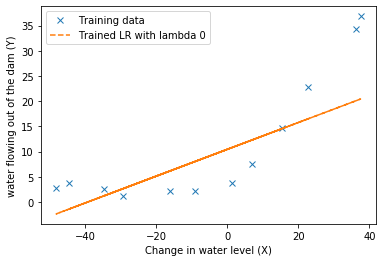

In [46]:
def trainLinearReg(X,y,Lambda):
    args = (X,y.flatten(),Lambda)
    init_w = np.ones((X.shape[1],1))
    result1 = fmin_tnc(linearRegCostFunction,init_w.flatten(),fprime=linRegGrad, args=args, disp=0)

    return result1[0]


Lambda = 0
w = trainLinearReg(np.column_stack((np.ones((m,1)),X)),Y,Lambda)
print('Weights with the optimization:',w)

plt.plot(X,Y,'x',label='Training data')
plt.plot(X,np.column_stack((np.ones((m,1)),X)) @ w,'--', label='Trained LR with lambda 0')
plt.xlabel('Change in water level (X)')
plt.ylabel('water flowing out of the dam (Y)')
plt.legend()
plt.show()

In [53]:
def learningCurve(X,Y,X_val,Y_val,Lambda):
    m = X.shape[0]

    error_train = np.zeros((m,1))
    error_val = np.zeros((m,1))

    for i in range (1,m):
        w = trainLinearReg(X[0:i,:],Y[0:i],Lambda)
        error_train[i] = linearRegCostFunction(X[0:i,:],Y[0:i],w,0)
        
 


    return error_train, error_val


Lambda = 0
asd = learningCurve(np.column_stack((np.ones((m,1)),X)),Y,np.column_stack((np.ones((X_val.size,1)),X_val)),Y_val,Lambda)

(12, 2)
[[ 2.13431051]
 [ 1.17325668]
 [34.35910918]
 [36.83795516]
 [ 2.80896507]
 [ 2.12107248]
 [14.71026831]
 [ 2.61418439]
 [ 3.74017167]
 [ 3.73169131]
 [ 7.62765885]
 [22.7524283 ]]
False
(12, 2)
[[ 2.13431051]
 [ 1.17325668]
 [34.35910918]
 [36.83795516]
 [ 2.80896507]
 [ 2.12107248]
 [14.71026831]
 [ 2.61418439]
 [ 3.74017167]
 [ 3.73169131]
 [ 7.62765885]
 [22.7524283 ]]
False


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)